In [81]:
import cv2 # for image processing
import easygui # to store filebox
import numpy as np # to store image
import imageio # to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image

In [82]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

"""fileopenbox opens the box to choose file
and help us store file path as string"""
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [83]:
def cartoonify(ImagePath):
    #read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
        
    Resized1 = cv2.resize(originalmage, (960, 540))
    #plt.show(Resized1, cmap='gray')
    
    # Converting an image to grayscale
    grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    Resized2 = cv2.resize(grayScaleImage, (960, 540))
    plt.imshow(Resized2, cmap='gray')
    
    # applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    Resized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(Resized3, cmap='gray')
    
    #retreiving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 9, 9)
    
    Resized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(Resized4, cmap='gray')
    
    #Applying bilateral filter to remove noise
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    Resized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(Resized5, cmap='gray')
    
    #Masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    
    Resized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')
    
    
    #Plotting the whole transition
    images=[Resized1, Resized2, Resized3, Resized4, Resized5, Resized6]
    fig, axes = plt.subplots(
        3,2, 
        figsize=(8,8), 
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw = dict(hspace=0.1, wspace=0.1)
    )
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    

In [84]:
# # confirm that image is chosen
#     if originalmage is None:
#         print("Can not find any image. Choose appropriate file")
#         sys.exit()

def save(Resized6, ImagePath):
    #save an image using imwrite()
    newName="cartoonified_image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(Resized6, cv2.COLOR+RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=none, message=I)

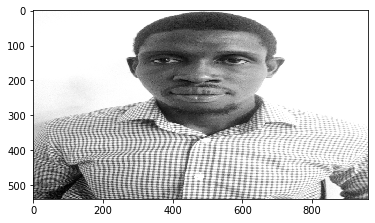

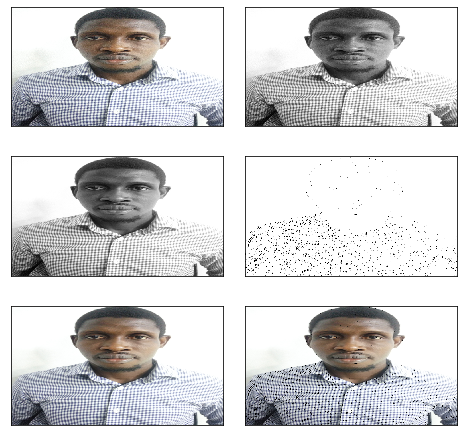

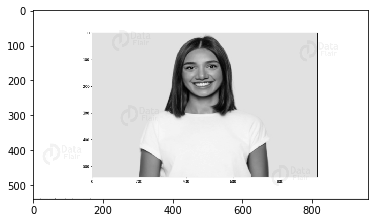

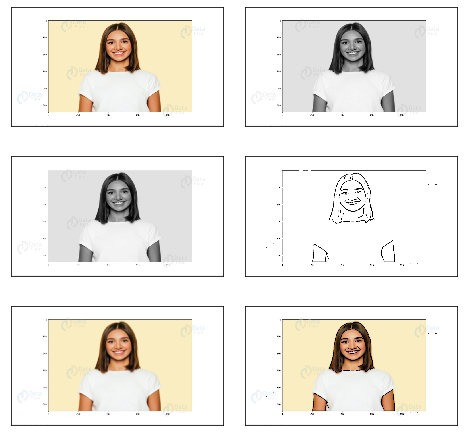

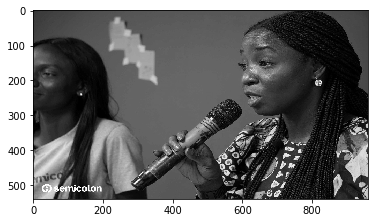

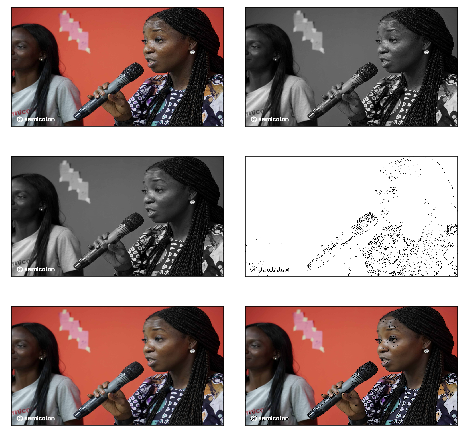

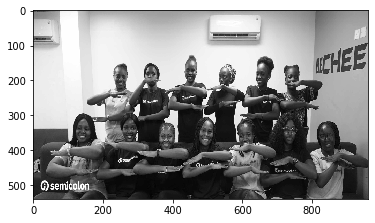

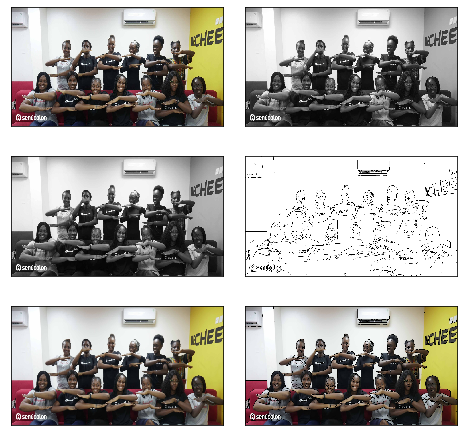

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\anaconda\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-82-f896c9d6b6bc>", line 11, in upload
    cartoonify(ImagePath)
  File "<ipython-input-83-172baad40c6a>", line 4, in cartoonify
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6lylwdcz\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



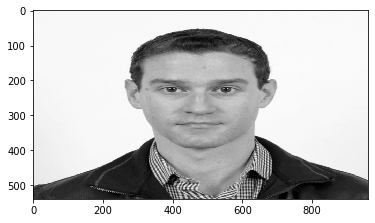

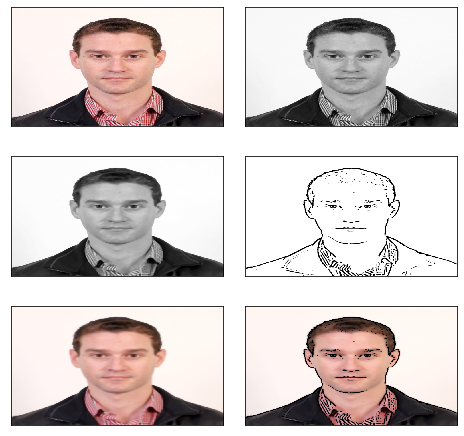

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\anaconda\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-82-f896c9d6b6bc>", line 11, in upload
    cartoonify(ImagePath)
  File "<ipython-input-83-172baad40c6a>", line 4, in cartoonify
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
cv2.error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6lylwdcz\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [85]:
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))

upload.pack(side=TOP,pady=50)

top.mainloop()